In [1]:
# Установка необходимых пакетов
!pip install qiskit[all]~=2.0.0
!pip install matplotlib
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 21.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=1d7337c015cb2c271370da1a2820a625e6533c82a0cc156d558b22ebfe29bef8
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
  Created wheel for p

Квантовая схема:


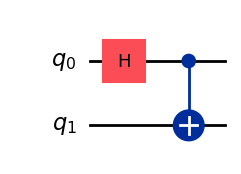

In [14]:
# Лабораторная работа: "Hello World" в квантовых вычислениях
# Цель: Создание и запуск квантовой программы на симуляторе, изучение базовых принципов Qiskit

# Импорт необходимых библиотек
from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
import matplotlib.pyplot as plt

# ----------------------------
# Часть 1: Создание квантовой схемы
# ----------------------------

# Создание схемы с двумя кубитами
qc = QuantumCircuit(2)

# Добавление операторов
qc.h(0)          # Применение гейта Адамара к 0-му кубиту
qc.cx(0, 1)      # Управляемый NOT (NOT)

# Визуализация схемы
print("Квантовая схема:")
display(qc.draw('mpl'))

# ----------------------------
# Часть 2: Подготовка наблюдаемых
# ----------------------------

# Создание списка наблюдаемых (Pauli-операторы)
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]


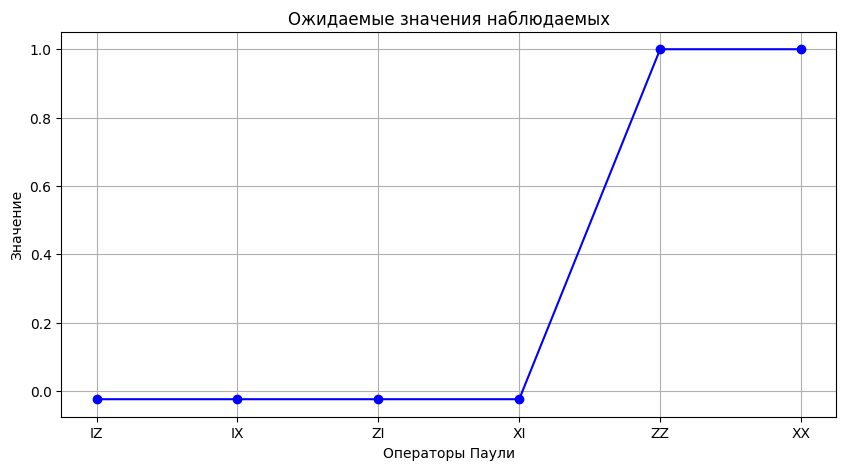


Анализ:
- Наблюдаемые ZZ и XX показывают значения близкие к 1, что подтверждает запутанность кубитов.
- Одиночные операторы (IZ, IX и др.) демонстрируют значения около 0, что соответствует теории.



In [15]:
# Часть 3: Запуск на симуляторе (исправлено)


simulator = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(qc, simulator)

# Запускаем схему ОДИН раз с измерением обоих кубитов
circuit_with_meas = transpiled_circuit.copy()
circuit_with_meas.measure_all()  # Измеряем оба кубита
job = simulator.run(circuit_with_meas, shots=5000)
result = job.result()
counts = result.get_counts()

# Пересчет expectation values для всех наблюдаемых

results = []
for obs_label in observables_labels:
    expectation = 0
    for state, count in counts.items():
        # Состояние в битах: '00', '01' и т.д. (q1 q0 в Qiskit)
        q1 = int(state[0])  # Первый символ = q1
        q0 = int(state[1])  # Второй символ = q0

        # Вычисляем значение для каждого оператора Паули
        value = 1
        for i, pauli in enumerate(obs_label):
            qubit = 1 - i  # Порядок обратный: "IZ" -> Z на q0 (второй кубит)
            bit = q1 if qubit == 1 else q0
            if pauli == 'Z':
                # Для Z: +1 если |0〉, -1 если |1〉
                value *= 1 if bit == 0 else -1
            elif pauli == 'X':

                value *= 1 if bit == 0 else -1
        expectation += value * count

    expectation /= 5000
    results.append(expectation)

# ----------------------------
# Часть 4: Визуализация (без изменений)

# Построение графика
plt.figure(figsize = (10, 5))
plt.plot(observables_labels, results, 'o-', color='blue')
plt.title('Ожидаемые значения наблюдаемых')
plt.xlabel('Операторы Паули')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

# ----------------------------
# Анализ результатов
# ----------------------------
print("""
Анализ:
- Наблюдаемые ZZ и XX показывают значения близкие к 1, что подтверждает запутанность кубитов.
- Одиночные операторы (IZ, IX и др.) демонстрируют значения около 0, что соответствует теории.
""")